# Notebook for initial pytrends data
https://pypi.org/project/pytrends/
    
    

In [ ]:
pip install pytrends

In [1]:
import pandas

## Connect to Google

In [44]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)


In [45]:
pytrends.suggestions("Democracy")

[{'mid': '/m/026wp', 'title': 'Democracy', 'type': 'Form of government'},
 {'mid': '/m/030ftv', 'title': 'Majority rule', 'type': 'Topic'},
 {'mid': '/m/02dtg', 'title': 'Detroit', 'type': 'City in Michigan'},
 {'mid': '/m/0drnm',
  'title': 'Representative democracy',
  'type': 'Form of government'},
 {'mid': '/m/018wl5',
  'title': 'Parliamentary system',
  'type': 'Form of government'}]

In [55]:
kw_list = {"Democracy", "Corruption"}
pytrends.build_payload(kw_list, cat=None,timeframe='all', geo='', gprop='') #, cat=0 not included

,Corruption,Democracy,isPartial
date,,,
2004-01-01,21,42,False
2004-02-01,27,51,False
2004-03-01,24,56,False
2004-04-01,27,56,False
2004-05-01,22,53,False
...,...,...,...
2020-11-01,19,39,False
2020-12-01,17,27,False
2021-01-01,17,34,False


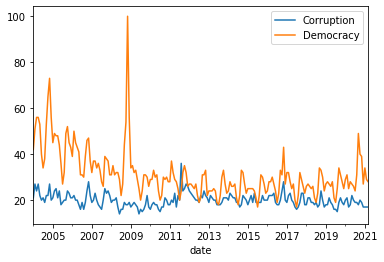

In [56]:
x = pytrends.interest_over_time()
x.plot()
pytrends.interest_over_time()

*get_historical_interest* gets an hourly interest from the specified times. Will not work if you do a large time period as google will block this request. Might be worth to make a function to get hourly interest of a time every year and construct data together. Or just use *interest_over_time*. jk use sleep to be not rate limited. it will take a while, recommend sleep value is 60

In [ ]:
y = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=None, geo='', gprop='', sleep=40)
y.plot()

### gprop

What Google property to filter to
Example 'images'
Defaults to web searches
Can be images, news, youtube or froogle (for Google Shopping results)

<AxesSubplot:xlabel='date'>

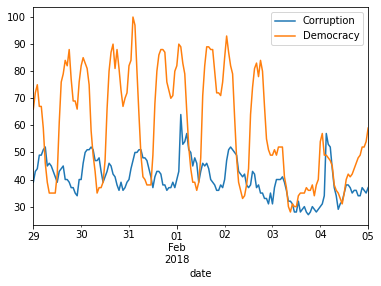

In [49]:
x = pytrends.interest_over_time() # Will now do interest over time  
x.plot()

<AxesSubplot:xlabel='geoName'>

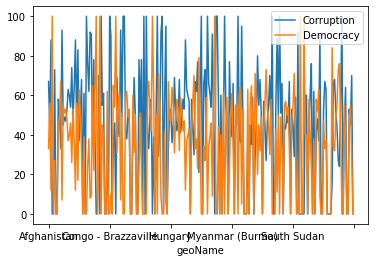

In [53]:
z = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
z.plot()

In [26]:
pytrends.related_queries()

ReadTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)